# Increasing Kaggle Revenue: Analyzing user data to recommend the best new product
In this project, we will create recommendations for increasing revenue at Kaggle, an online community for data science professionals. We will analyze a Kaggle customer survey, attempting to learn if there are any indicators of potential revenue growth for the company. To make our recommendations, we will try to learn:

Is there market potential for a "freemium" kernel product?
Is there market potential for a consulting marketplace?
Based on current user data, which is more likely to be more profitable?

# Data Cleaning
To begin, we import and clean the dataset provided from Kaggle. Four datasets are provided, which we will read in as separate files. 

Only the 'multiple_choice_responses.csv' file, which contains the answers to all multiple choice questions, will be relevant for this analysis.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

# reading in csv file
mc = pd.read_csv('mcr.csv')

# exploring overall data
mc.info()
mc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
# Reassigning header to first row and removing first row
mc.columns = mc.iloc[0,:]
mc = mc[1:]
mc.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,...,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft SQL Server,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Oracle Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Microsoft Access,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Relational Database Service,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS DynamoDB,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Azure SQL Database,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Google Cloud SQL,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - None,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other,Which of the following relational database products do you use on a regular basis? (Select all that apply) - Other - Text
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [4]:
# Remove duplicates
mc = mc.drop_duplicates()
print(len(mc))

19713


In [5]:
# Removing "text" columns
text_columns = mc.filter(regex=(".*\ Text$"))
mc.drop(text_columns.columns, axis=1, inplace=True)

In [6]:
# Listing column names
mc.columns.values

array(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice

In [7]:
## Creating 'activities' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions':
                   'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['activities'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions':
                   'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [8]:
## Creating 'fav_media' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)':
                   'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['fav_media'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)':
                   'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [9]:
## Creating 'dscourse_platforms' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity':
                   'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['dscourse_platforms'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity':
                   'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [10]:
## Creating 'ides_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ":
                   "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ides_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Jupyter (JupyterLab, Jupyter Notebooks, etc) ":
                   "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other"]
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [11]:
## Creating 'notebooks_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels) ':
                   'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['notebooks_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  Kaggle Notebooks (Kernels) ':
                   'Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [12]:
## Creating 'langs_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':
                   'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['langs_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':
                   'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [13]:
## Creating 'dataviz_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ':
                   'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['dataviz_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice -  Ggplot / ggplot2 ':
                   'What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [14]:
## Creating 'hardware_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs':
                   'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['hardware_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - CPUs':
                   'Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [15]:
## Creating 'ml_alg_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression':
                   'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_alg_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression':
                   'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [16]:
## Creating 'ml_tools_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)':
                   'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_tools_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Automated data augmentation (e.g. imgaug, albumentations)':
                   'Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [17]:

## Creating 'cvision_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)':
                   'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cvision_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)':
                   'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [18]:
## Creating 'nlp_methods_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)':
                   'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['nlp_methods_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)':
                   'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [19]:
## Creating 'ml_frameworks_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ':
                   'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_frameworks_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn ':
                   'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [20]:
## Creating 'cloud_platform_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ':
                   'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cloud_platform_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice -  Google Cloud Platform (GCP) ':
                   'Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [21]:
## Creating 'cloud_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)':
                   'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['cloud_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - AWS Elastic Compute Cloud (EC2)':
                   'Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [22]:
## Creating 'bigdataanalytics_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Google BigQuery':
                   'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['bigdataanalytics_used_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Google BigQuery':
                   'Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [23]:
## Creating 'ml_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - SAS':
                   'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['ml_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - SAS':
                   'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [24]:
## Creating 'automl_tools_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google AutoML ':
                   'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['automl_tools_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  Google AutoML ':
                   'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [25]:
## Creating 'reldb_products_used' column
# Assigning Multiple Choice columns into a single column with nan values
test_list = mc.loc[:,'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL':
                   'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].apply(
    lambda x: ",".join(x.dropna()), axis=1)
test_list = test_list.replace({'nannannan':np.nan})
mc['reldb_products_used'] = test_list
# Dropping Multiple Choice columns from range
drop_list = mc.loc[:,'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - MySQL':
                   'Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice - Other']
drop_list_cols = list(drop_list.columns.values)
mc.drop(drop_list_cols, axis=1, inplace=True)

In [26]:
# Making column names readable
column_clean = {'Duration (in seconds)':'duration',
                'What is your age (# years)?':'age',
                'What is your gender? - Selected Choice':'gender',
                'In which country do you currently reside?':'country',
                'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'education',
                'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'title',
                'What is the size of the company where you are employed?':'comp_size',
                'Approximately how many individuals are responsible for data science workloads at your place of business?':'ds_teamsize',
                'Does your current employer incorporate machine learning methods into their business?':'use_ml',
                'What is your current yearly compensation (approximate $USD)?':'compensation',
                'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?':'dollars_mlorcloud',
                'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice':'prim_analaysistool',
                'How long have you been writing code to analyze data (at work or at school)?':'coding_years',
                'Have you ever used a TPU (tensor processing unit)?':'used_tpu',
                'For how many years have you used machine learning methods?':'ml_years'}
mc = mc.rename(columns=column_clean)

In [27]:
#replacing null str with NaN
mc = mc.replace('None', np.nan)
mc = mc.replace('', np.nan)

In [28]:
mc.head()

,duration,age,gender,country,education,title,comp_size,ds_teamsize,use_ml,compensation,...,ml_tools_used,cvision_used,nlp_methods_used,ml_frameworks_used,cloud_platform_used,cloud_products_used,bigdataanalytics_used_used,ml_products_used,automl_tools_used,reldb_products_used
1,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,391,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999",...,Automation of full ML pipelines (e.g. Google A...,"General purpose image/video tools (PIL, cv2, s...",NaN,"Scikit-learn , TensorFlow , Keras , RandomF...",Microsoft Azure,"Azure Virtual Machines,Azure Container Service","Databricks,Microsoft Analysis Services",Azure Machine Learning Studio,NaN,Azure SQL Database
5,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",...,NaN,NaN,NaN,"Scikit-learn , RandomForest, Xgboost , Light...",NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#checking for null values 
mc.apply(lambda x: sum(x.isnull()))

0
duration                          0
age                               0
gender                            0
country                           0
education                       390
title                           606
comp_size                      5711
ds_teamsize                    6090
use_ml                         6486
compensation                   7216
dollars_mlorcloud              7463
prim_analaysistool             4023
coding_years                   4086
used_tpu                       5510
ml_years                       5531
activities                    10487
fav_media                      3507
dscourse_platforms             4635
ides_used                      5324
notebooks_used                10447
langs_used                     5309
dataviz_used                   6700
hardware_used                  5495
ml_alg_used                    6811
ml_tools_used                 13620
cvision_used                  15424
nlp_methods_used              17158
ml_frameworks_used        

In [30]:
#Filter categorical variables
categorical_columns = [x for x in mc.dtypes.index if mc.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in mc if x not in ['duration', 'activities', 'fav_media', 'dscourse_platforms', 'ides_used',
                      'notebooks_used', 'langs_used', 'dataviz_used', 'hardware_used', 'ml_alg_used',
                      'ml_tools_used', 'cvision_used', 'nlp_methods_used', 'ml_frameworks_used',
                      'cloud_platform_used', 'cloud_products_used', 'bigdataanalytics_used_used',
                      'ml_products_used', 'automl_tools_used', 'reldb_products_used']]
#Print frequency of all relevant categories
for col in categorical_columns:
    print('\nFrequency of Categories for %s'%col)
    print(mc[col].value_counts())


Frequency of Categories for age
25-29    4458
22-24    3609
30-34    3120
18-21    2499
35-39    2087
40-44    1439
45-49     949
50-54     692
55-59     422
60-69     338
70+       100
Name: age, dtype: int64

Frequency of Categories for gender
Male                       16134
Female                      3212
Prefer not to say            318
Prefer to self-describe       49
Name: gender, dtype: int64

Frequency of Categories for country
India                                                   4783
United States of America                                3084
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada  

In [31]:
# Creating Age Frequency Table
age_freq = mc['age'].value_counts(normalize=True)
age_freq = age_freq.sort_index(axis=0)
age_freq = age_freq.reset_index()
age_freq = pd.DataFrame(age_freq)
age_freq

,index,age
0,18-21,0.126769
1,22-24,0.183077
2,25-29,0.226145
3,30-34,0.158271
4,35-39,0.105869
5,40-44,0.072998
6,45-49,0.048141
7,50-54,0.035104
8,55-59,0.021407
9,60-69,0.017146


Text(0.5,0,'Age Range')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



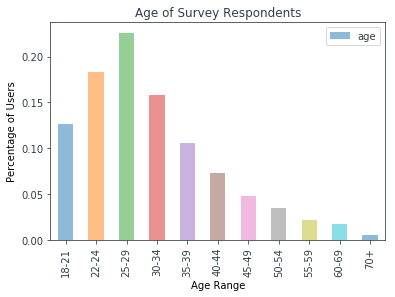

In [38]:
age_freq.plot(kind="bar", x="index", y ="age", alpha=0.5)
plt.title('Age of Survey Respondents')
plt.ylabel('Percentage of Users')
plt.xlabel('Age Range')

Text(0.5,0.98,'Age of Survey Respondents')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



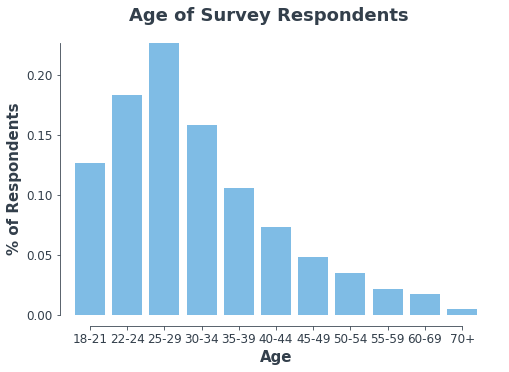

In [33]:
# Setting style for bar graphs
import matplotlib.pyplot as plt
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(age_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=age_freq['age'], color='#007ACC', alpha=0.5, linewidth=30)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Age', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, age_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

# set background color
ax.set_facecolor('white')

# add margin to y-axis
ax.margins(0.1, 0)

# add title
fig.suptitle('Age of Survey Respondents', fontsize=18, fontweight='black')


In [78]:
# Creating Gender Frequency Table
gender_freq = mc['gender'].value_counts(normalize=True)
gender_freq = gender_freq.reset_index()
gender_freq = gender_freq.sort_index(axis=0)
gender_freq = pd.DataFrame(gender_freq)
gender_freq

,index,gender
0,Male,0.818445
1,Female,0.162938
2,Prefer not to say,0.016131
3,Prefer to self-describe,0.002486


Text(0.5,0,'Gender')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



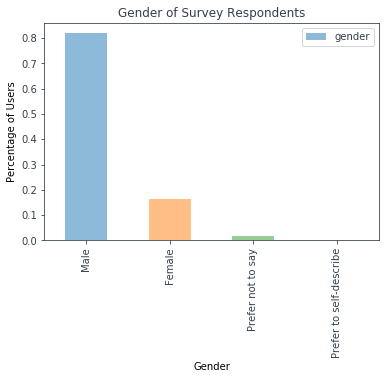

In [79]:
gender_freq.plot(kind="bar", x="index", y ="gender", alpha=0.5)
plt.title('Gender of Survey Respondents')
plt.ylabel('Percentage of Users')
plt.xlabel('Gender')

Text(0.5,0.98,'Gender of Survey Respondents')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



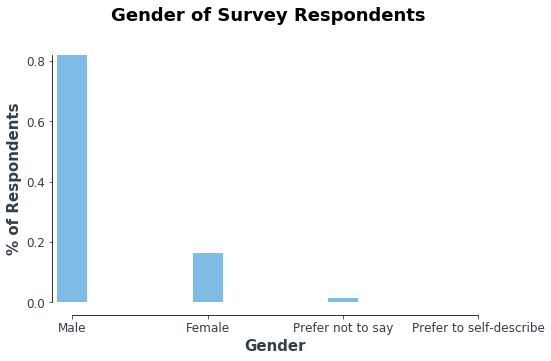

In [109]:
# Creating Gender Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(gender_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=gender_freq['gender'], color='#007ACC', alpha=0.5, linewidth=30)

# create for each bin a dot at the level of the expense percentage value
# plt.plot(my_range, age_freq['age'], "o", markersize=10, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Gender', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, gender_freq['index'])


# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# add title
fig.suptitle('Gender of Survey Respondents', fontsize=18, fontweight='black')

In [42]:
# Renaming long value name
mc['country'] = mc['country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
mc['country'] = mc['country'].replace('United States of America', 'USA')
# Creating Country Frequency Table
country_freq = mc['country'].value_counts(normalize=True, ascending=False)
#country_freq = country_freq.sort_index(axis=0)
country_freq = country_freq.reset_index()
country_freq = pd.DataFrame(country_freq)
country_freq = country_freq.loc[country_freq['country'] >= .01]

Text(0.5,0,'Country')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



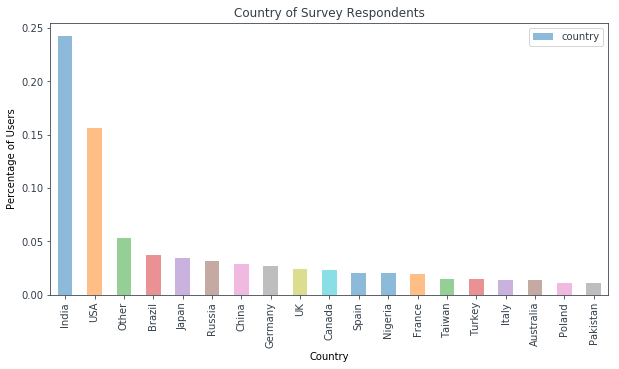

In [76]:
country_freq.plot(kind="bar", x="index", y ="country",figsize=(10,5), alpha=0.5)
plt.title('Country of Survey Respondents')
plt.ylabel('Percentage of Users')
plt.xlabel('Country')

Text(0.5,0.98,'Country of Survey Respondents (> 1%)')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



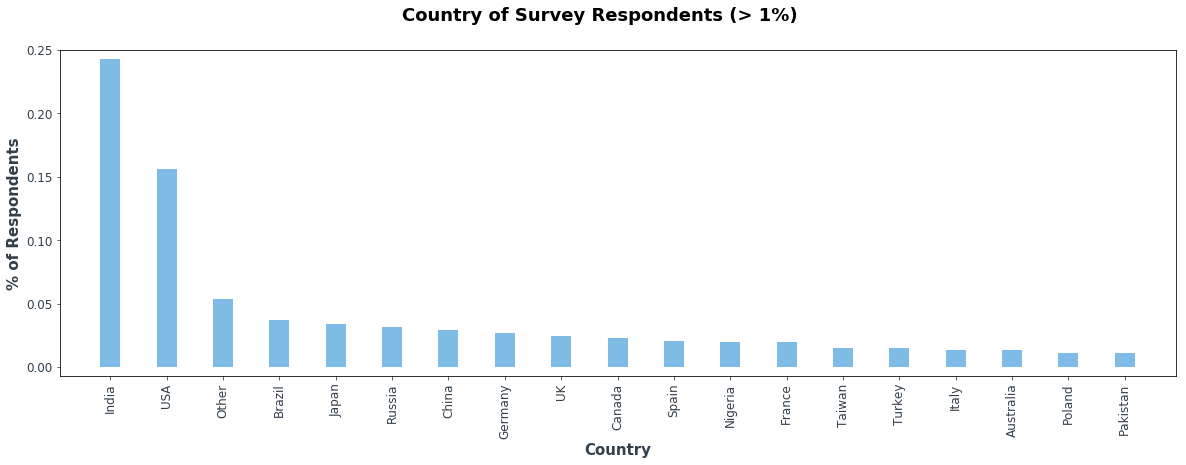

In [118]:
# Creating Country Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(country_freq.index)+1))

fig, ax = plt.subplots(figsize=(20,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=country_freq['country'], color='#007ACC', alpha=0.5, linewidth=20)


# set labels
ax.set_xlabel('Country', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, country_freq['index'], rotation=45)

# add margin to y-axis
ax.margins(0.05, 0.03)
ax.set_xticklabels(country_freq['index'], rotation=90)

# add title
fig.suptitle('Country of Survey Respondents (> 1%)', fontsize=18, fontweight='black')


In [46]:
# Renaming long descriptors
mc['education'] = mc['education'].replace("Some college/university study without earning a bachelor’s degree", 'Some college')
mc['education'] = mc['education'].replace('No formal education past high school', 'High School')

# Creating Education Frequency Table
education_freq = mc['education'].value_counts(normalize=True)
education_freq = education_freq.reset_index()
gender_freq = education_freq.sort_index(axis=0)
education_freq = pd.DataFrame(education_freq)

Text(0.5,0,'Education')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



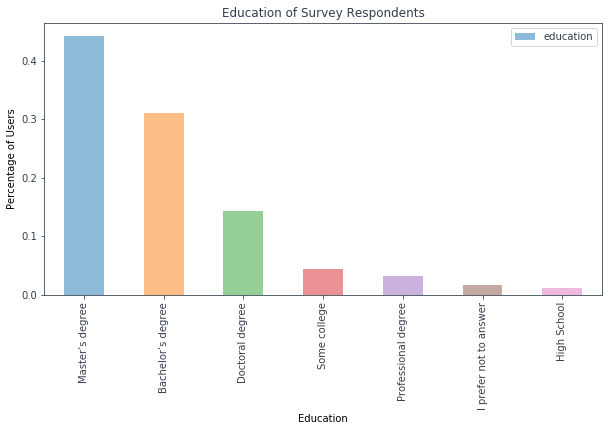

In [75]:
education_freq.plot(kind="bar", x="index", y ="education",figsize=(10,5), alpha=0.5)
plt.title('Education of Survey Respondents')
plt.ylabel('Percentage of Users')
plt.xlabel('Education')

Text(0.5,0.98,'Highest Education Level of Survey Respondents')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



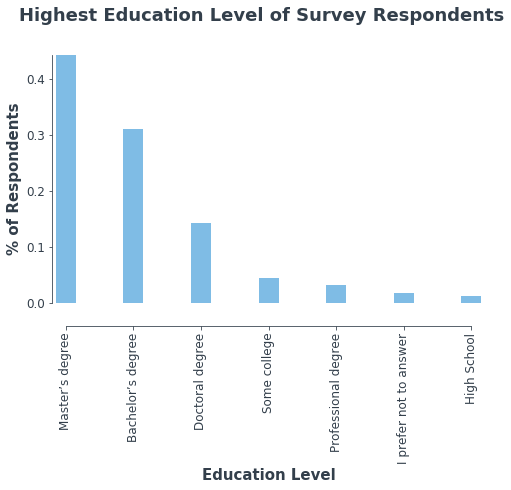

In [126]:
# Creating Education Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# numeric placeholder for the y axis
my_range=list(range(1,len(education_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=education_freq['education'], color='#007ACC', alpha=0.5, linewidth=20)


# set labels
ax.set_xlabel('Education Level', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, education_freq['index'])

# add an horizonal label for the y axis 
# fig.text(-0.15, 0.5, '% of Respondants', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))


ax.set_xticklabels(education_freq['index'], rotation=90)

# add title
fig.suptitle('Highest Education Level of Survey Respondents', fontsize=18, fontweight='black')

In [52]:
# Creating Title Frequency Table
title_freq = mc['title'].value_counts(normalize=True)
title_freq = title_freq.reset_index()
title_freq = title_freq.sort_index(axis=0)
title_freq = pd.DataFrame(title_freq)

Text(0.5,0,'Title')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



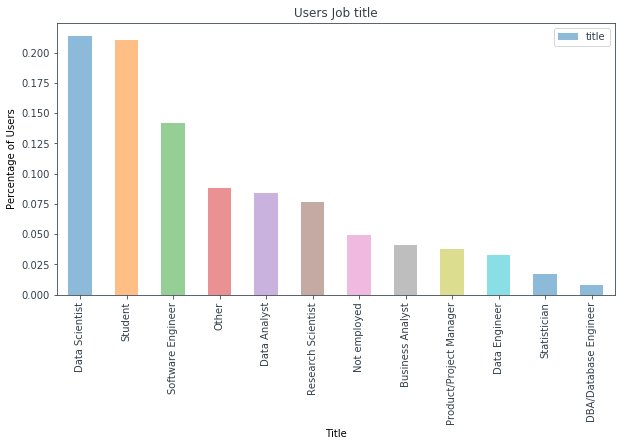

In [74]:
title_freq.plot(kind="bar", x="index", y ="title",figsize=(10,5), alpha=0.5)
plt.title('Users Job title')
plt.ylabel('Percentage of Users')
plt.xlabel('Title')

Text(0.5,0.98,'Job Title of Survey Respondents')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



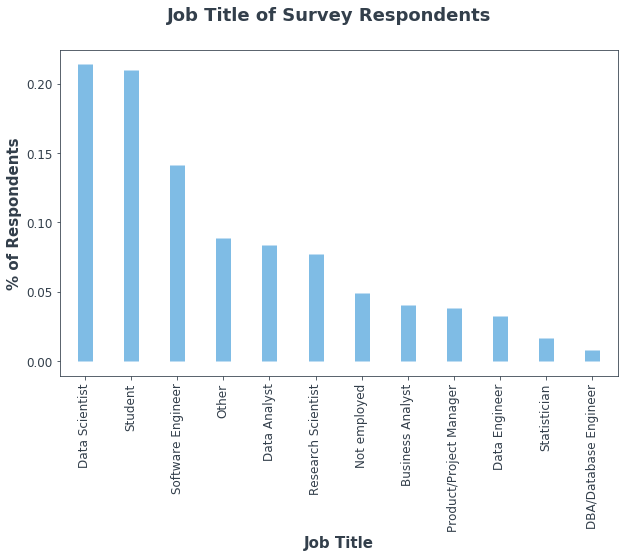

In [131]:
# Creating Title Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(title_freq.index)+1))

fig, ax = plt.subplots(figsize=(10,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=title_freq['title'], color='#007ACC', alpha=0.5, linewidth=15)

# set labels
ax.set_xlabel('Job Title', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, title_freq['index'], rotation=45)





ax.set_xticklabels(title_freq['index'], rotation=90)

# add title
fig.suptitle('Job Title of Survey Respondents', fontsize=18, fontweight='black')


In [55]:
# Creating Data Science Team Size Frequency Table
ds_teamsize_freq = mc['ds_teamsize'].value_counts(normalize=True)
ds_teamsize_freq = ds_teamsize_freq.reset_index()
ds_teamsize_freq = ds_teamsize_freq.sort_index(axis=0)
ds_teamsize_freq = pd.DataFrame(ds_teamsize_freq)


Text(0.5,0,'Team Size')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



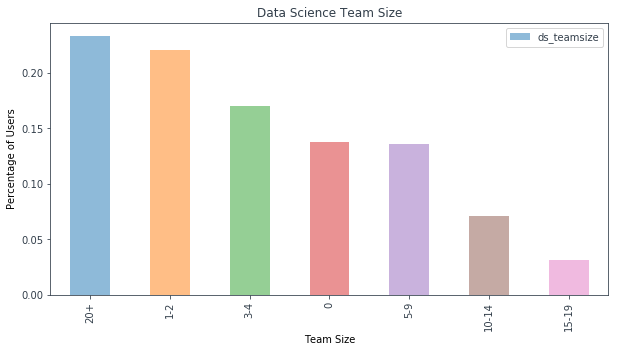

In [73]:
ds_teamsize_freq .plot(kind="bar", x="index", y ="ds_teamsize",figsize=(10,5), alpha=0.5)
plt.title('Data Science Team Size')
plt.ylabel('Percentage of Users')
plt.xlabel('Team Size')

Text(0.5,0.98,'Data Science Team Size of Survey Respondents')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



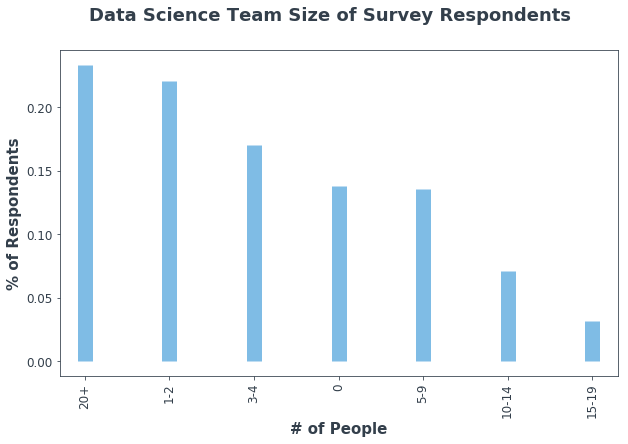

In [133]:
# Creating Data Science Team Size Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(ds_teamsize_freq.index)+1))

fig, ax = plt.subplots(figsize=(10,6))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=ds_teamsize_freq['ds_teamsize'], color='#007ACC', alpha=0.5, linewidth=15)

# set labels
ax.set_xlabel('# of People', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, ds_teamsize_freq['index'], rotation=45)

ax.set_xticklabels(ds_teamsize_freq['index'], rotation=90)

# add ds_teamsize
fig.suptitle('Data Science Team Size of Survey Respondents', fontsize=18, fontweight='black')



In [61]:
# Creating larger bins for compensation
mc['compensationhi'] = mc['compensation'].str.extract(r'(?<=-|\$)(.*$)')
mc['compensationhi'] = mc['compensationhi'].str.replace(',','')
mc['compensationhi'] = mc['compensationhi'].str.replace('-','')
mc['compensationhi'] = mc['compensationhi'].str.replace('<','')
mc['compensationhi'] = mc['compensationhi'].astype(float)
mc['compensationbins'] = pd.cut(mc['compensationhi'], [0, 50000, 100000, 200000, 300000, 500000, 1000000], 
                                labels=['$0-50K', '$50-100K', '$100-200K', '$200-300K', '$300-500K', '$500K+'])

In [62]:
# Creating Compensation Frequency Table
compensationbins_freq = mc['compensationbins'].value_counts(normalize=True)
compensationbins_freq = compensationbins_freq.reset_index()
compensationbins_freq = compensationbins_freq.sort_index(axis=0)
compensationbins_freq = pd.DataFrame(compensationbins_freq)
compensationbins_freq

,index,compensationbins
0,$0-50K,0.628711
1,$50-100K,0.206930
2,$100-200K,0.133392
3,$200-300K,0.018404
4,$300-500K,0.012563
5,$500K+,0.000000


Text(0.5,0,'Yearly Salary')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



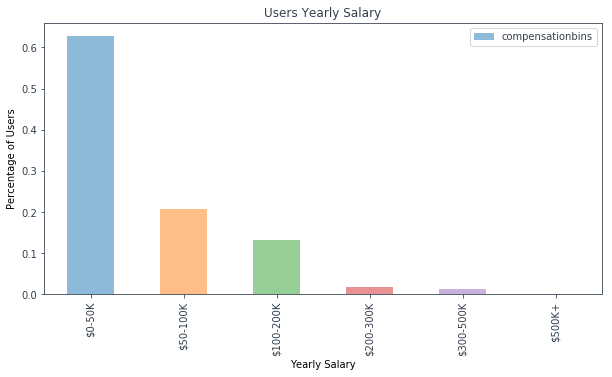

In [72]:
compensationbins_freq.plot(kind="bar", x="index", y ="compensationbins",figsize=(10,5), alpha=0.5)
plt.title('Users Yearly Salary')
plt.ylabel('Percentage of Users')
plt.xlabel('Yearly Salary')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



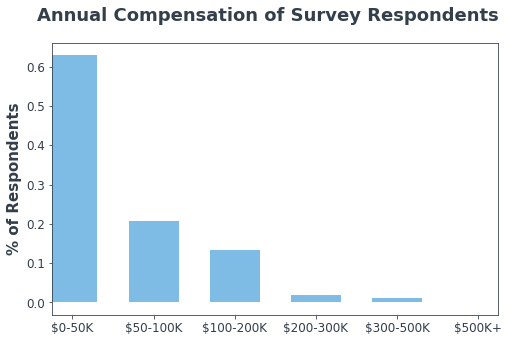

In [138]:
# Creating Compensation Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(compensationbins_freq.index)+1))

fig, ax = plt.subplots(figsize=(8,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=compensationbins_freq['compensationbins'], color='#007ACC', alpha=0.5, linewidth=50)


# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, compensationbins_freq['index'])


# add title
fig.suptitle('Annual Compensation of Survey Respondents', fontsize=18, fontweight='black')

plt.savefig('compensationbins_freq.png', dpi=300, bbox_inches='tight')

In [64]:
# Renaming bins for dollars spent
rename = {'$0 (USD)':'$0','$100-$999':'$100-$1k',
          '$1000-$9,999':'$1K-$10K','$1-$99':'$1-$100',
          '$10,000-$99,999':'$10K-$100K','> $100,000 ($USD)':'$100K+'}
mc['dollars_mlorcloud'] = mc['dollars_mlorcloud'].replace(rename)

dollars_mlorcloud = mc['dollars_mlorcloud'].value_counts(normalize=True)
dollars_mlorcloud = dollars_mlorcloud.reset_index()
dollars_mlorcloud = dollars_mlorcloud.sort_index(axis=0)
dollars_mlorcloud = pd.DataFrame(dollars_mlorcloud)

Text(0.5,0,'Spent on Ml or Cloud')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



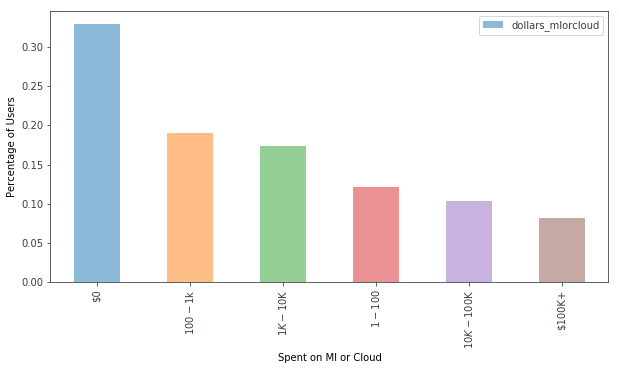

In [71]:
dollars_mlorcloud.plot(kind="bar", x="index", y ="dollars_mlorcloud",figsize=(10,5), alpha=0.5)
plt.ylabel('Percentage of Users')
plt.xlabel('Spent on Ml or Cloud')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



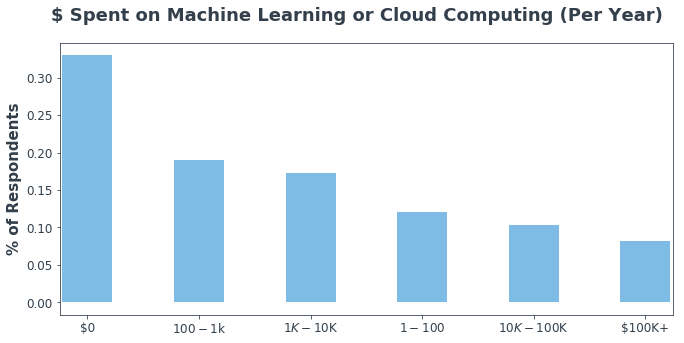

In [141]:
# Creating Dollars Spent Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(dollars_mlorcloud.index)+1))

fig, ax = plt.subplots(figsize=(11,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=dollars_mlorcloud['dollars_mlorcloud'], color='#007ACC', alpha=0.5, linewidth=50)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, dollars_mlorcloud['index'])

# add title
fig.suptitle('$ Spent on Machine Learning or Cloud Computing (Per Year)', fontsize=18, fontweight='black')


In [68]:
# Renaming bins for machine learning years
mc['ml_years'] = mc['ml_years'].str.replace(' years', '')

# Creating machine learning years spent Frequency Table
ml_years = mc['ml_years'].value_counts(normalize=True)
ml_years = ml_years.reset_index()
ml_years = ml_years.sort_index(axis=0)
ml_years = pd.DataFrame(ml_years)

Text(0.5,0,'Experience')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



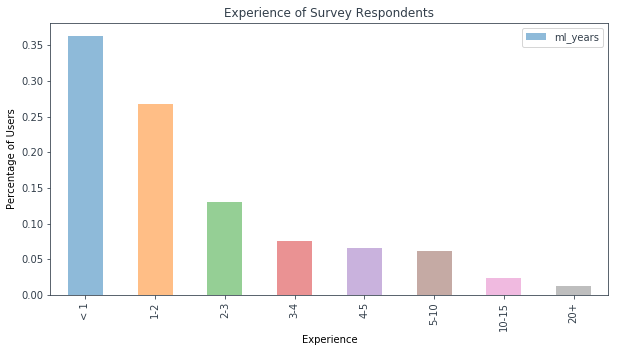

In [70]:
ml_years.plot(kind="bar", x="index", y ="ml_years",figsize=(10,5), alpha=0.5)
plt.title('Experience of Survey Respondents')
plt.ylabel('Percentage of Users')
plt.xlabel('Experience')

Text(0.5,0.98,'# of Years Experience with Machine Learning')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans



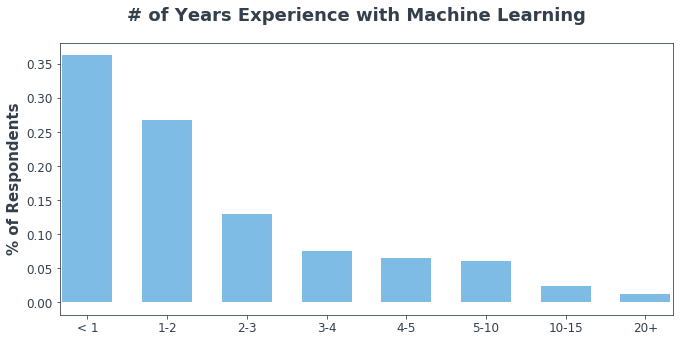

In [143]:
# Creating machine learning years Frequency Graph
# Setting style for bar graphs
%matplotlib inline

# numeric placeholder for the y axis
my_range=list(range(1,len(ml_years.index)+1))

fig, ax = plt.subplots(figsize=(11,5))

# create for each bin a vertical line that starts at y = 0 with the length 
# represented by the specific percentage.
plt.vlines(x=my_range, ymin=0, ymax=ml_years['ml_years'], color='#007ACC', alpha=0.5, linewidth=50)

# set labels
ax.set_xlabel('', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('% of Respondents', fontsize=15, fontweight='black', color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(my_range, ml_years['index'])

# add title
fig.suptitle('# of Years Experience with Machine Learning', fontsize=18, fontweight='black')

# EDA Results
After reviewing the categorical variables, several important insights stand out:

Over 20% of the survey respondents are students, and as such are not likely to help drive revenue in either a freemium kernel product or a consulting marketplace. Their information should be removed to further evaluate Kaggle's target market for these products.

Nearly 25% of respondents currently reside in India, and a significant majority live outside the United States, which could make users more likely to engage in a remote consulting marketplace product.
Over 65% of respondents currently work on a Data Science team of 3 or more people, and over 20% work on a team of 1-2 people. As a result, the vast majority of Kaggle customers are already working collaboratively on data-science related products.

Over 60% of respondents make less than 50K per year. As a result, they are not likely to have a large amount of discretionary income for paid Data Science collaboration services.

Over 60% of respondents work for companies who have spent nothing on Machine Learning or Cloud Computing, and have personally spent less than 2 years working with Machine Learning products.

# Further Analysis
To continue our analysis, we will focus our dataset on only those respondents who are currently working in the data science/analysis field. These respondents are most likely to use any Kaggle products and contribute to increased revenue. To do this, we will remove 'student' values from the dataset.

In [144]:
# Get names of indexes for which title is student.
indexNames = mc[mc['title'] == 'Student' ].index
 
# Delete these row indexes from dataFrame
mcclean = mc.drop(indexNames)
print(len(mc)-len(mcclean))

4014


# Potential for Freemium Service
First, we will explore the adjusted compensation percentages, having removed students (more likely to be unemployed or underemployed) from the sample.

In [145]:
# Creating Compensation Frequency Table
compensationbins_clean = mcclean['compensationbins'].value_counts(normalize=True)
compensationbins_clean = compensationbins_clean.reset_index()
compensationbins_clean = compensationbins_clean.sort_index(axis=0)
compensationbins_clean = pd.DataFrame(compensationbins_clean)
print(compensationbins_clean)

       index  compensationbins
0     $0-50K          0.628711
1   $50-100K          0.206930
2  $100-200K          0.133392
3  $200-300K          0.018404
4  $300-500K          0.012563
5     $500K+          0.000000


Working with this smaller sample, the compensation numbers are still skewed largely to the lower-end. Over 60% of non-student Kaggle users make less than 50k per year. This means they are probably less likely to have discretionary income for a paid-subscription service.

Next, we will use this reduced sample size to see how many respondents are a part of a large data science team, which would require collaboration on data science projects.

In [146]:
# Creating Data Science Team Size Frequency Table
ds_teamsize_clean = mcclean['ds_teamsize'].value_counts(normalize=True)
ds_teamsize_clean = ds_teamsize_clean.reset_index()
ds_teamsize_clean = ds_teamsize_clean.sort_index(axis=0)
ds_teamsize_clean = pd.DataFrame(ds_teamsize_clean)
print(ds_teamsize_clean.head())

  index  ds_teamsize
0   20+     0.233282
1   1-2     0.220583
2   3-4     0.170227
3     0     0.138002
4   5-9     0.135580


After removing students from the survey data, over 53% of respondents are on a data science team of 3 or more, with over 23% on a team of 20+ people. In addition, 22% are on a team of 1-2, which could mean additional opportunity for collaboration in this space.

Given this number, it seems as though the overall number of people who might be interested in a collaborative freemium service is notable.


# Result of Analysis
Given the relatively low compensation rates of Kaggle users, it is unlikely that individual customers will sign up for a paid model in large numbers. And since the majority of Kaggle users come from companies of less than 1,000 employees, it is unlikely that large-scale enterprise subscriptions will be a significant revenue driver.

Even when considering the potential value increase that a freemium kernel product could provide through increasing overall exposure and access, adding a freemium product is not likely to increase the overall Kaggle user base. GitHub seems to be the dominant player in this market segment, and the cost of creating and marketing a unique freemium service would likely be cost-prohibitive.

According to this analysis of the current Kaggle customer base, it is unlikely that a kernel subscription service will be able to generate substantial new revenue for the company.

# Alternative Solution: Potential for Consulting Marketplace
When considering the potential value of providing a consulting marketplace, there are several factors to consider:

The brand awareness to attract companies with a need for outside talent.
The availability of talented users to provide meaningful solutions.

Attracting Talented Contractors
In addition, the survey data shows that Kaggle is already connected with a valuable pool of potential contract-based employees. As noted above, over 60% of respondents make less than 50k per year, which could be a helpful indicator of users looking to profit from contract-based data science work. The popularity of Kaggle competitions, prize winners receiving cash prizes, is an obvious indicator that Kaggle is readily connected with potential data science contractors.

Also, there is a highly-qualified subset of Kaggle Users which could demand high-dollar contracts, thus increasing revenue potential for the company.

In [147]:
# Creating Education Frequency Table
education_freq_clean = mcclean['education'].value_counts(normalize=True)
education_freq_clean = education_freq_clean.reset_index()
gender_freq_clean = education_freq_clean.sort_index(axis=0)
education_freq_clean = pd.DataFrame(education_freq_clean)
education_freq_clean.head()

,index,education
0,Master’s degree,0.461297
1,Bachelor’s degree,0.275132
2,Doctoral degree,0.161147
3,Some college,0.035731
4,Professional degree,0.035731


When "student" respondents are removed, over 62% of Kaggle users hold at least a Master's degree, with 16% holding a doctoral degree.

Add to this the factor that nearly 25% of Kaggle respondents are from India, and over 80% live outside the United States, and there is a vast majority of users that could potentially be interested in a remote, consulting-based opportunity.

# Final Conclusions
After exploring the results of a Kaggle user survey, our initial hypothesis is disproven. Because of the proliferation of free collaborative environments like GitHub, and the unlikely customer base for personal or enterprise subscriptions, a freemium service seems likely to increase revenue only marginally. In contrast, because of Kaggle's readily available connections with motivated employers in need of outside help, and a large user base of high-skilled potential contractors, a contractor marketplace could drive much more revenue for the cost of implementation.

As a result of this analysis, we can determine that Kaggle is more likely to drive significant future revenue from a monetized consultant marketplace, rather than a freemium kernel product.